# Introduction

# Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

# Data Loading

In [3]:
df = pd.read_csv('data.csv')

# Basic Exploration

In [4]:
df.head() 

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


In [6]:
print("Datasets Total Columns", df.columns) #columns list

The dataset Columns Index(['Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Playing_Position', 'Minute', 'At_score', 'Type',
       'Goal_assist'],
      dtype='object')


In [9]:
df.shape #shape

(710, 13)

In [10]:
df.describe(include=['object']).T

,count,unique,top,freq
Season,710,21,14/15,61
Competition,710,17,LaLiga,311
Matchday,710,52,Group Stage,75
Date,710,468,09-12-15,5
Venue,710,2,H,404
Club,710,5,Real Madrid,450
Opponent,710,129,Sevilla FC,27
Result,710,57,3:00,49
Playing_Position,652,5,LW,356
Minute,710,106,90,17


# Exploritory Data Analysis of club Goals

### Goals In Different competition

In [55]:
fig = px.histogram(
    df,
    x='Competition',
    title="Goals in different competition",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Club'])
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgba(0,0,0,0)'    # Transparent plot area background
)

# Show the Plotly plot
fig.show()

In [15]:
pd.DataFrame(df.Competition.value_counts()) # value count for every competition

,Competition
LaLiga,311
UEFA Champions League,140
Premier League,103
Serie A,81
Copa del Rey,22
FA Cup,13
Saudi Pro League,9
FIFA Club World Cup,7
EFL Cup,4
Supercopa,4


### Goals Per Season

In [56]:
fig = px.histogram(
    df,
    x='Season',
    title="Goals per season",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Season','Club'])
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgba(0,0,0,0)'    # Transparent plot area background
)

# Show the Plotly plot
fig.show()

### Goals Per Club

In [59]:
fig = px.histogram(
    df,
    x='Club',
    title="Goals per Clubs - Seasons",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=600,
    color='Season',
    hover_name='Season',
    hover_data=['Competition','Season','Club'])
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgba(0,0,0,0)'    # Transparent plot area background
)

# Show the Plotly plot
fig.show()

### Goals Per Club - Competition

In [60]:
fig = px.histogram(
    df,
    x='Club',
    title="Goals per Clubs - Competition",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Competition',
    hover_name='Competition',
    hover_data=['Competition','Season','Club'])
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgba(0,0,0,0)'    # Transparent plot area background
)

# Show the Plotly plot
fig.show()

### Goals per playing position

In [61]:
fig = px.histogram(
    df,
    x='Playing_Position',
    title="Goals per playing Position",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgba(0,0,0,0)'    # Transparent plot area background
)

# Show the Plotly plot
fig.show()

### Goals per game minute

In [29]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")
df.loc[df.Minute.str[:3]=='45+', 'Minute'] = '1stE'
df.loc[df.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
df.loc[df.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'
mins1=mins[:46]
mins2=mins[46:92]
mins3=mins[92:]

C:\Users\django\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Goals per Game Minute (First Half)')

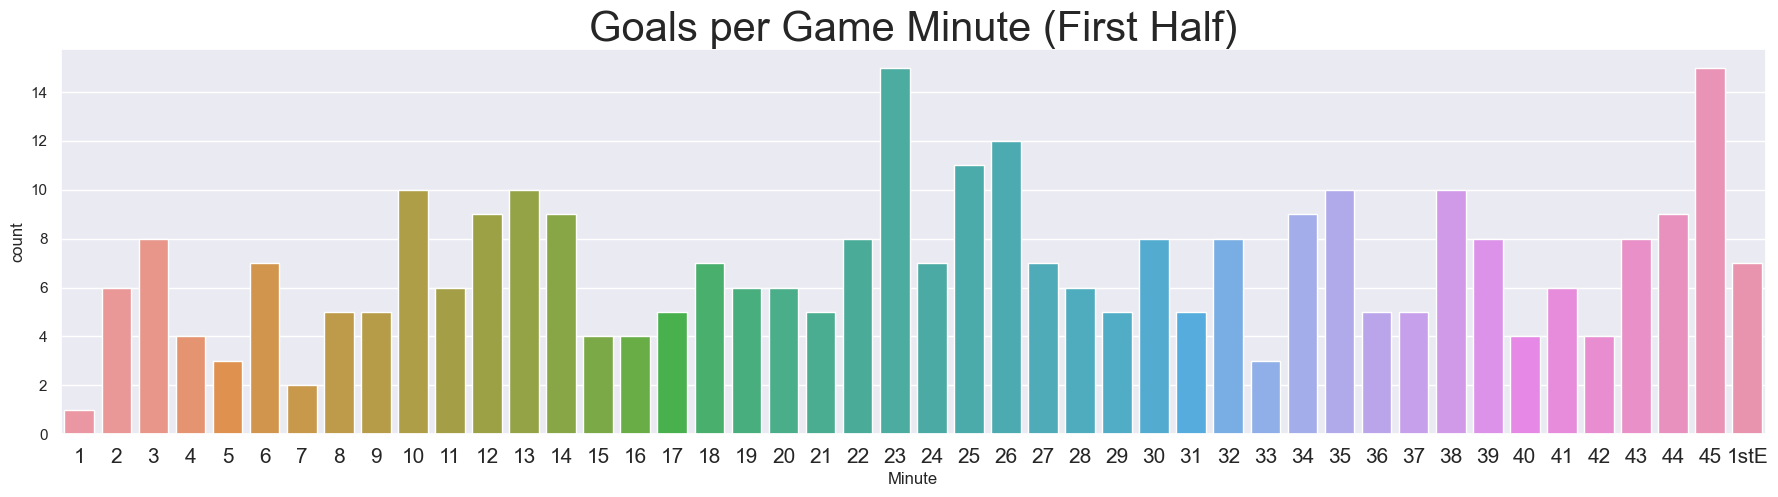

In [30]:
sns.set(rc={'figure.figsize':(22,5)})
plt.xticks(fontsize=15)
p=sns.countplot(df['Minute'],order=mins1)
p.axes.set_title("Goals per Game Minute (First Half)",fontsize=30)

C:\Users\django\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Goals per Game Minute (Second Half With Extra time)')

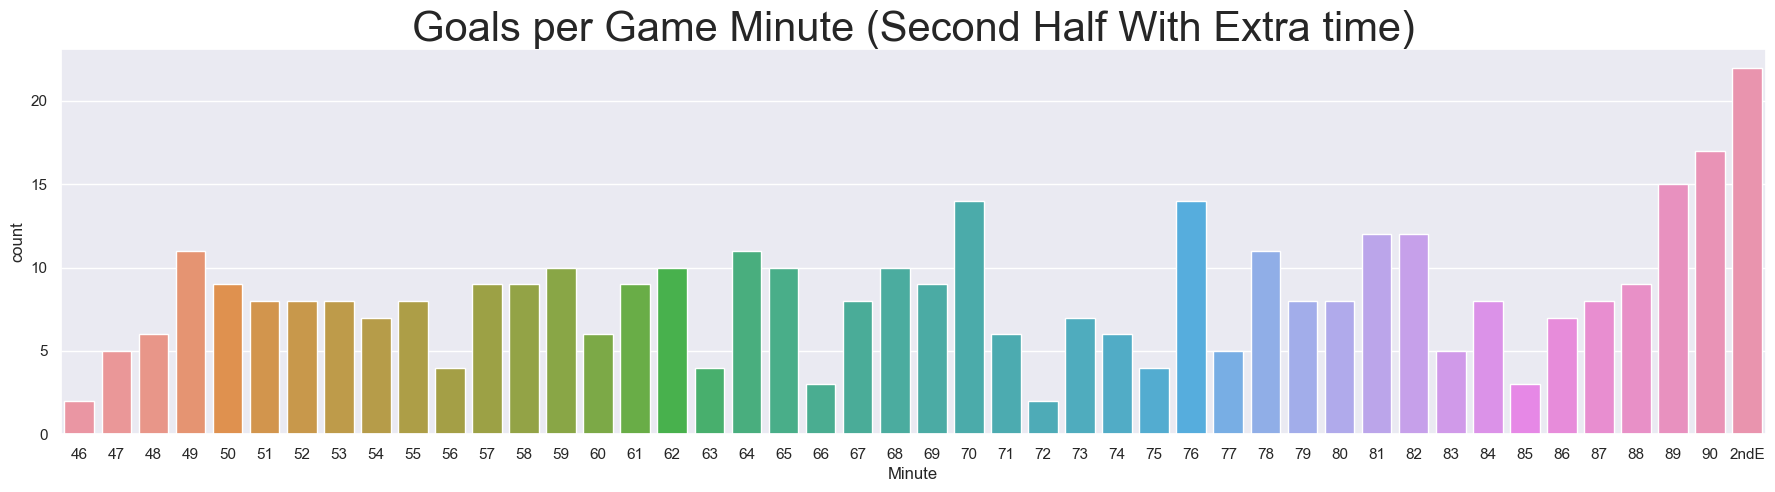

In [31]:
p=sns.countplot(df['Minute'],order=mins2)
p.axes.set_title("Goals per Game Minute (Second Half With Extra time)",fontsize=30)

C:\Users\django\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Goals per Game Minute (91-Extra times)')

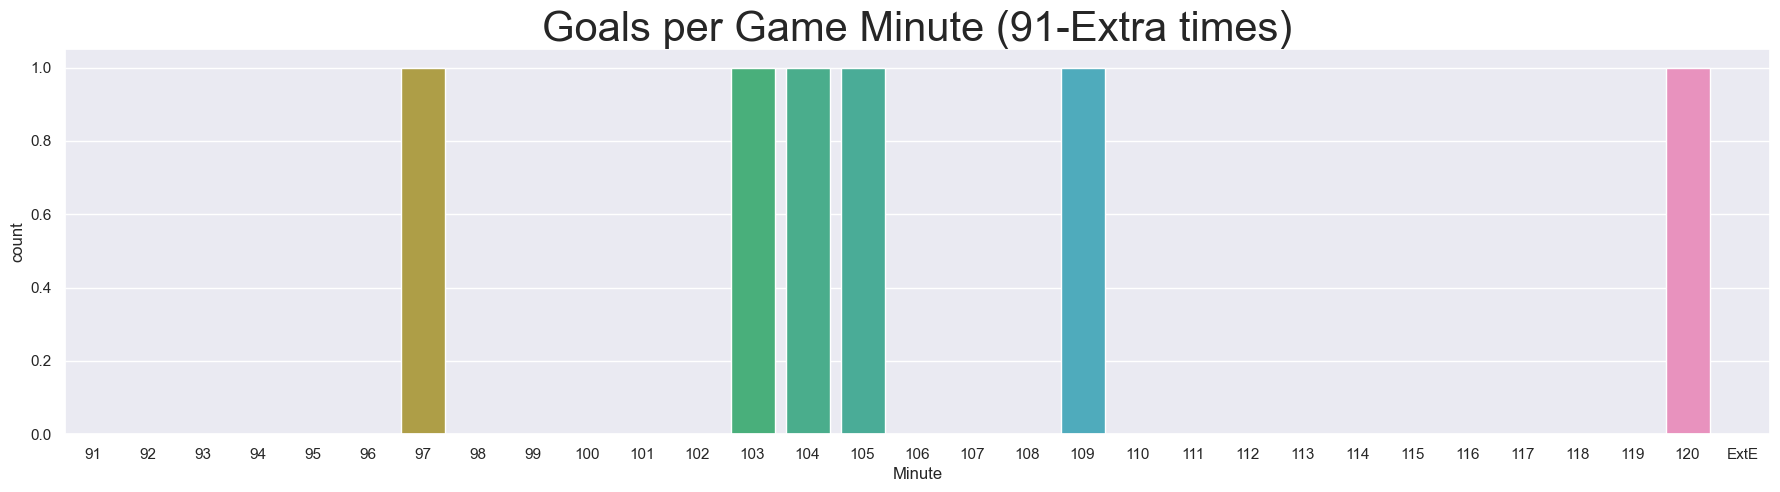

In [32]:
p=sns.countplot(df['Minute'],order=mins3)
p.axes.set_title("Goals per Game Minute (91-Extra times)",fontsize=30)

In every minute of the 90 mins game Cristiano Ronaldo Scores !! That's Insane !

### Goals Per Type of Goals

In [33]:
px.histogram(
    df,
    x='Type',
    title="Goals per Type",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

### Scoreline After Goals

C:\Users\django\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Scoresheet after scoring')

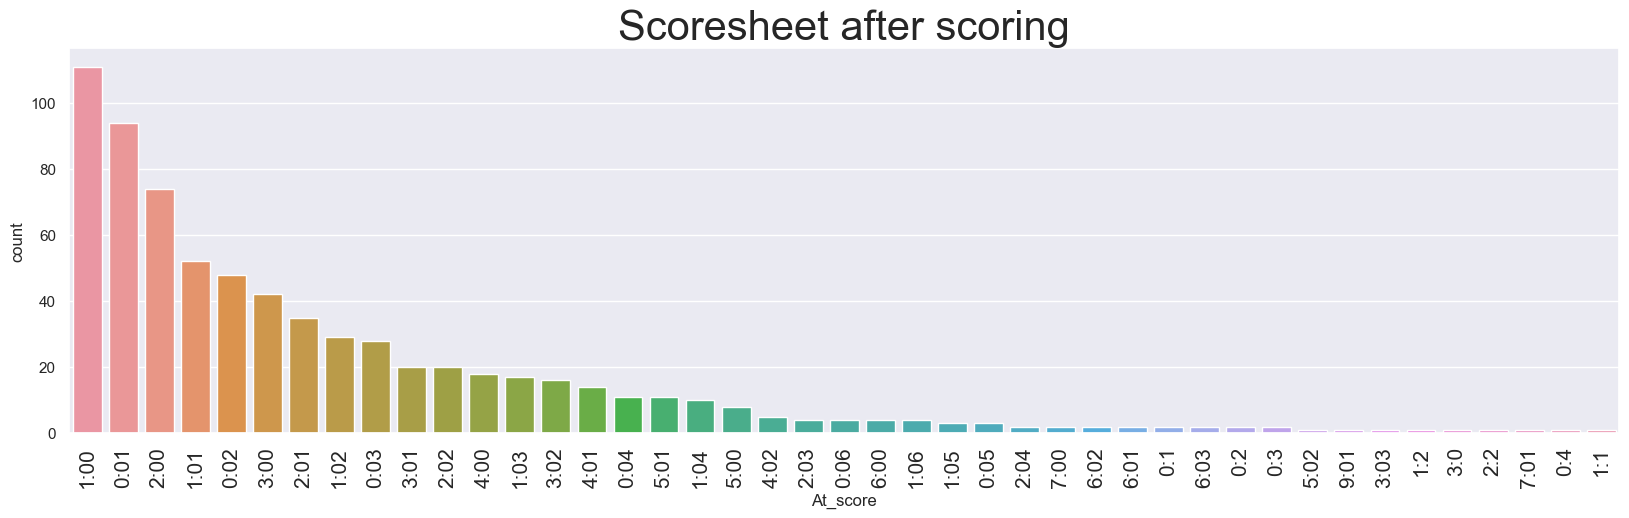

In [34]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['At_score'],hue_order=df.groupby('Competition'),order=df.At_score.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Scoresheet after scoring",fontsize=30)

### Goals Against Opponents

C:\Users\django\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Goals per Opponent')

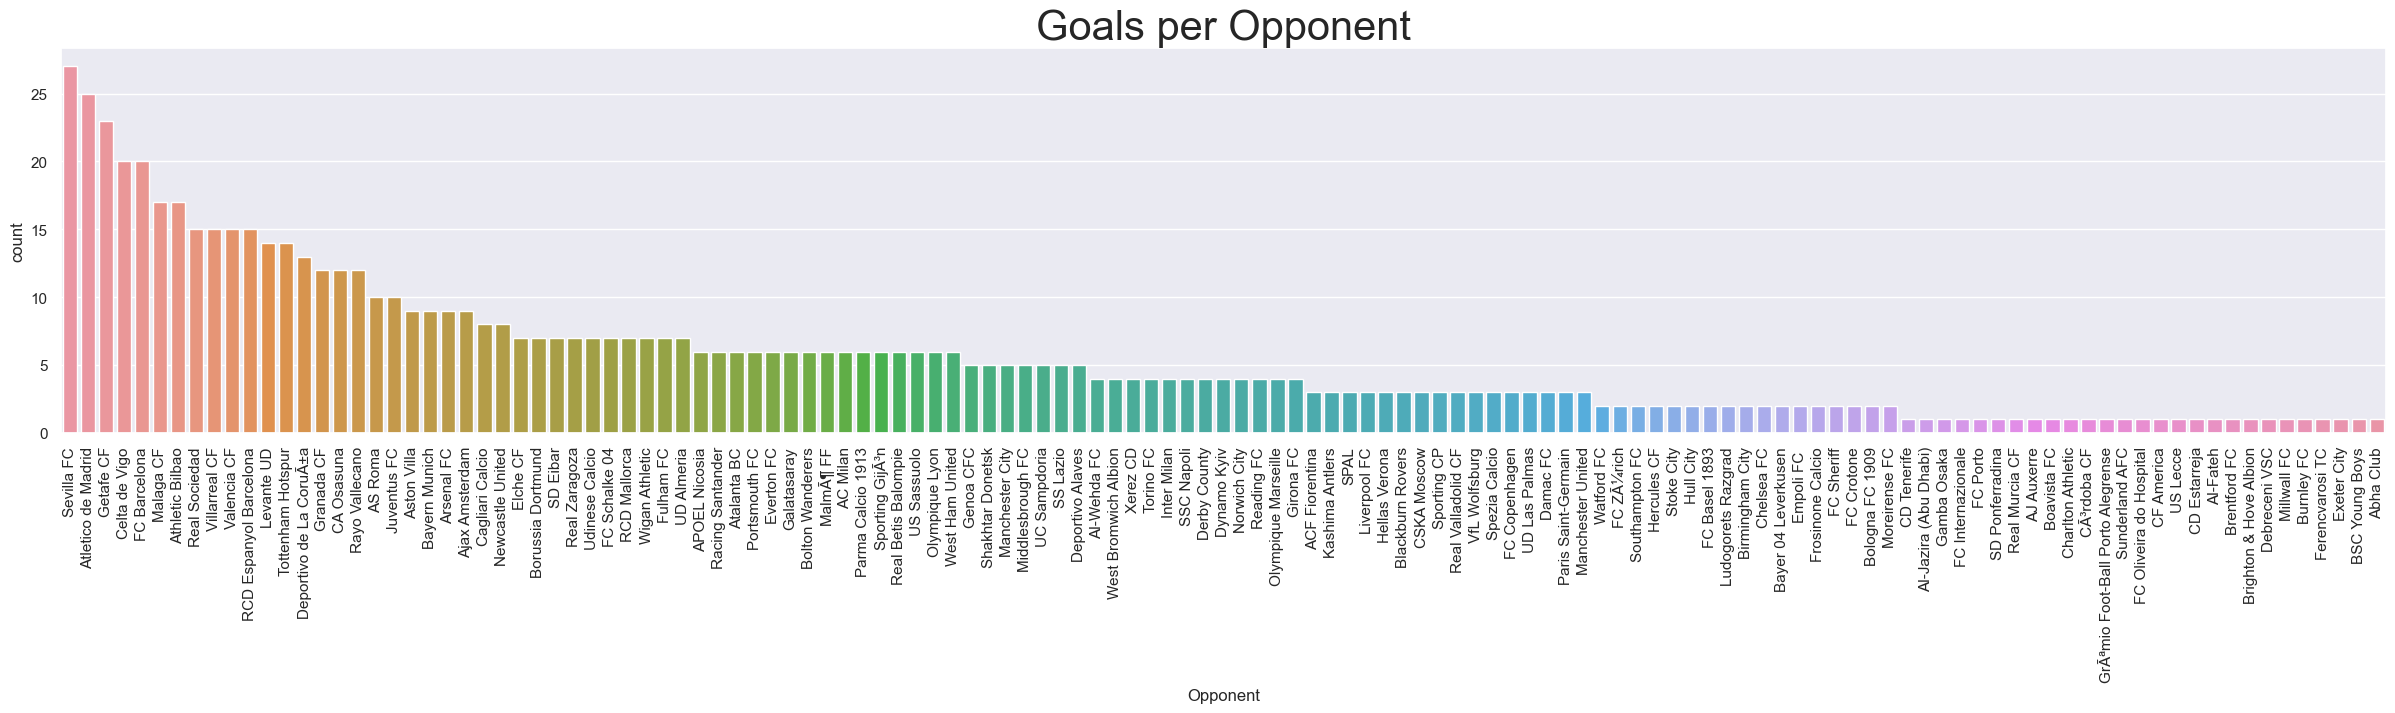

In [38]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(rotation='vertical')
p=sns.countplot(df['Opponent'],hue_order=df.groupby('Competition'),order=df.Opponent.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Opponent",fontsize=30)

In [39]:
mins=list(map(str, df.Opponent.value_counts().sort_values(ascending=False).index))
for min in df['Opponent']:
    if min not in mins:
        mins.append(min)
mins1=mins[:int(len(mins)/5)]
mins2=mins[int(len(mins)/5):int(2*len(mins)/5)]
mins3=mins[2*int(len(mins)/5):int(3*len(mins)/5)]
mins4=mins[3*int(len(mins)/5):int(4*len(mins)/5)]
mins5=mins[int(4*len(mins)/5):]

C:\Users\django\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Goals per Opponents')

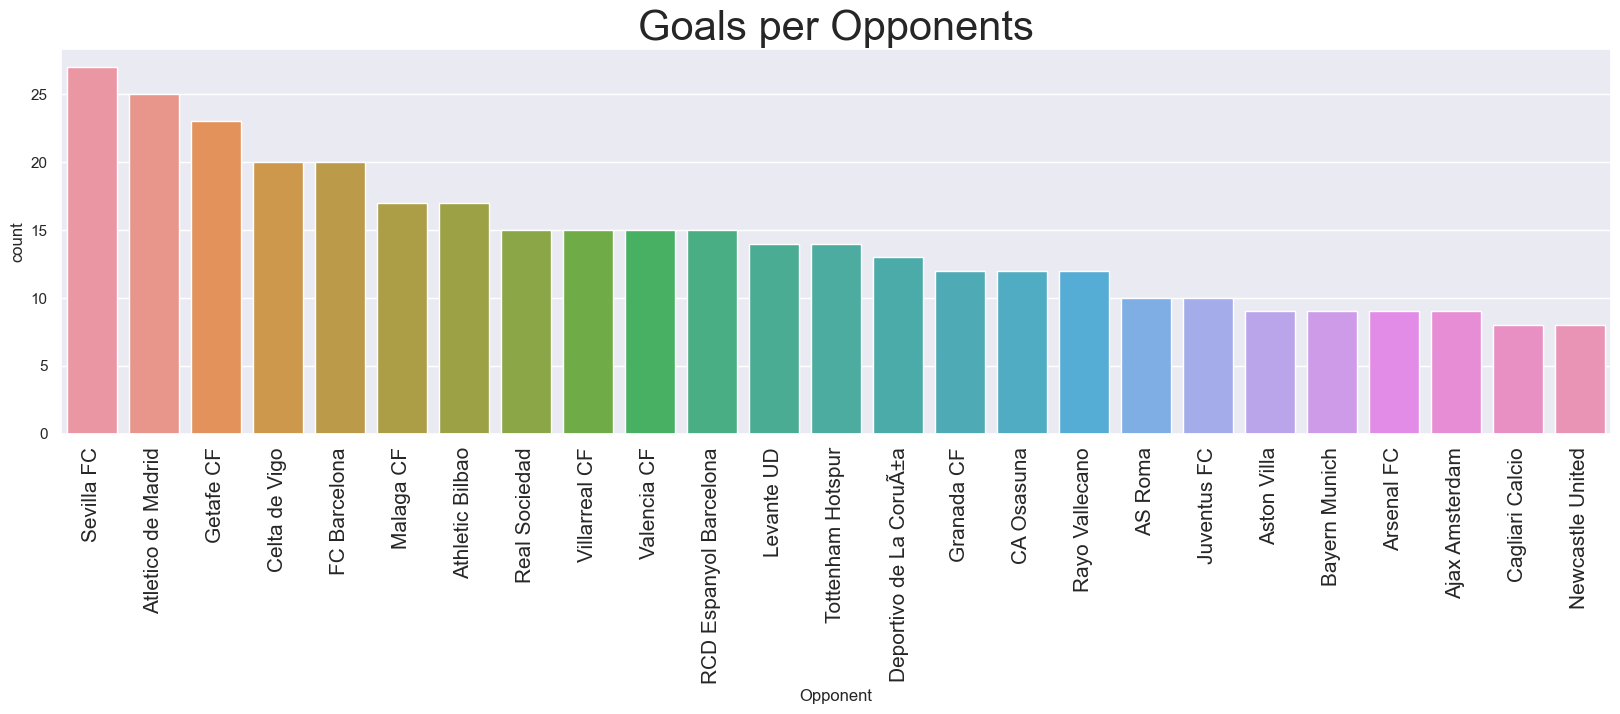

In [40]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins1)
p.axes.set_title("Goals per Opponents",fontsize=30)

C:\Users\django\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Goals per Opponents')

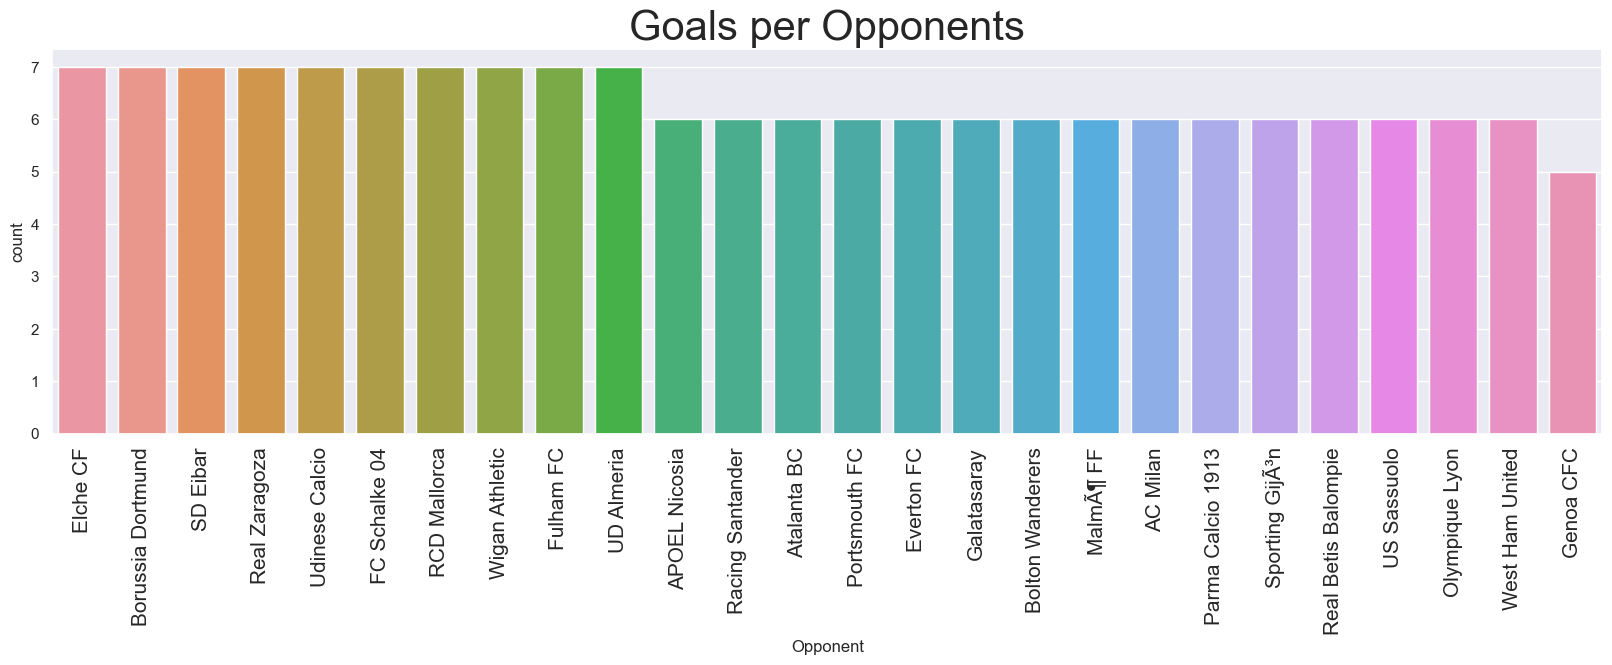

In [41]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins2)
p.axes.set_title("Goals per Opponents",fontsize=30)

C:\Users\django\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Goals per Opponents')

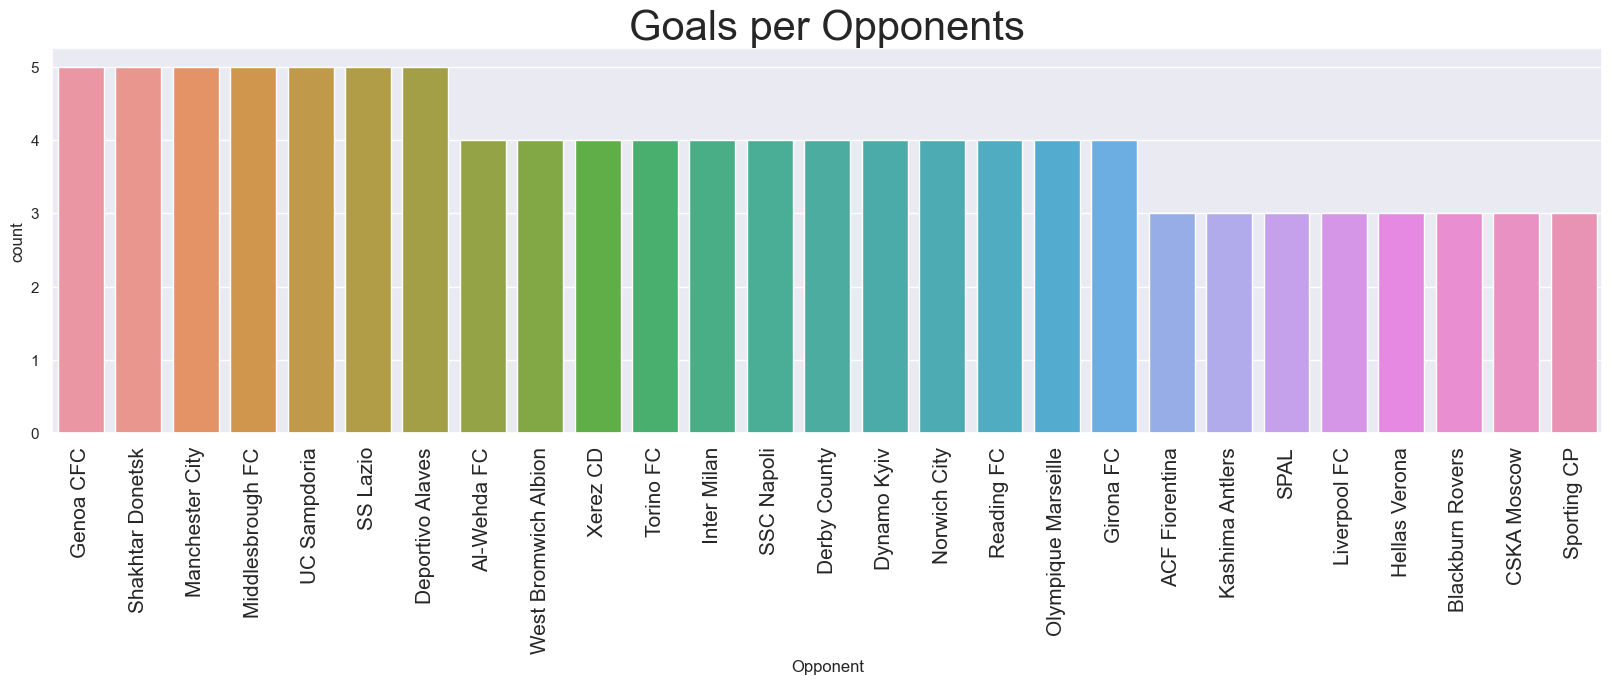

In [42]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins3)
p.axes.set_title("Goals per Opponents",fontsize=30)

C:\Users\django\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Goals per Opponents')

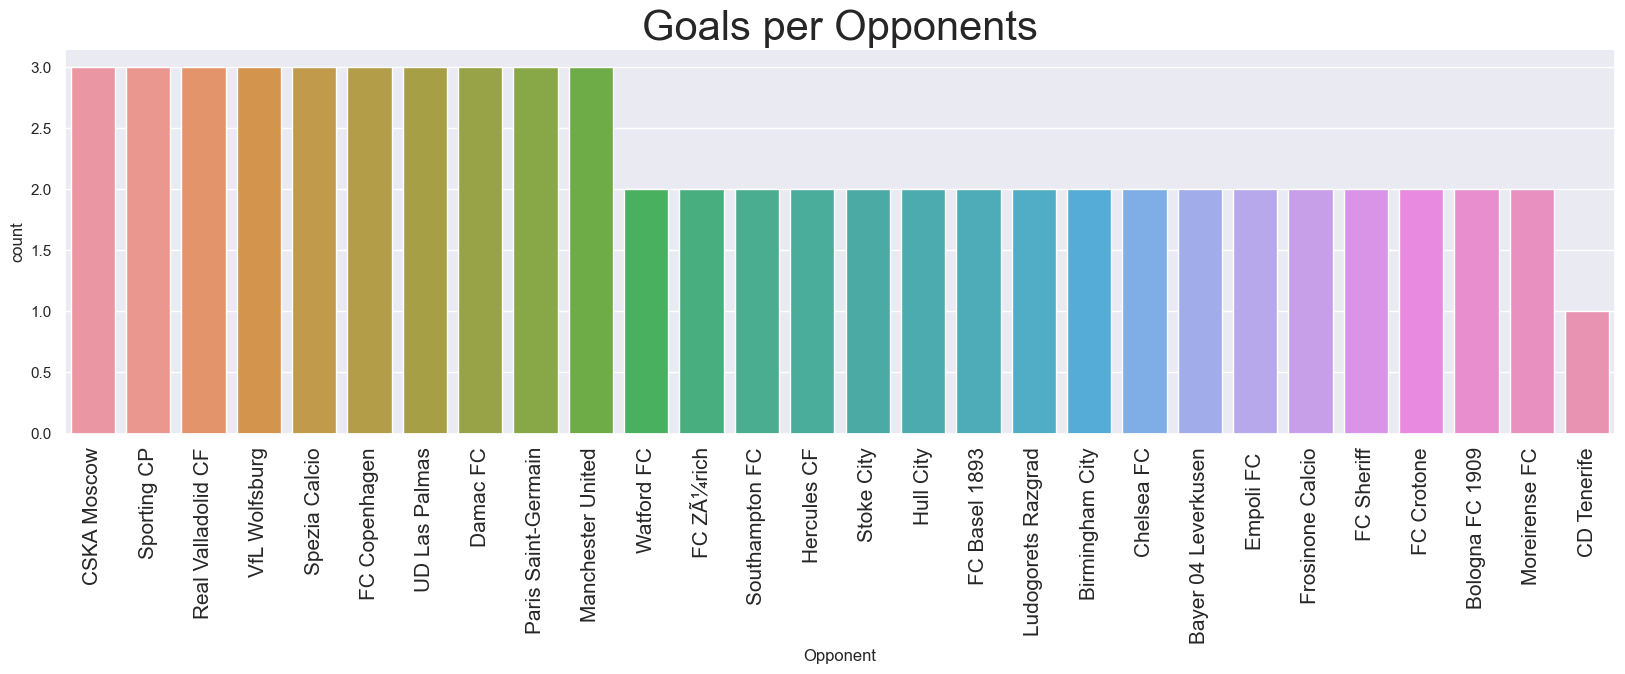

In [43]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins4)
p.axes.set_title("Goals per Opponents",fontsize=30)

C:\Users\django\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Goals per Opponents')

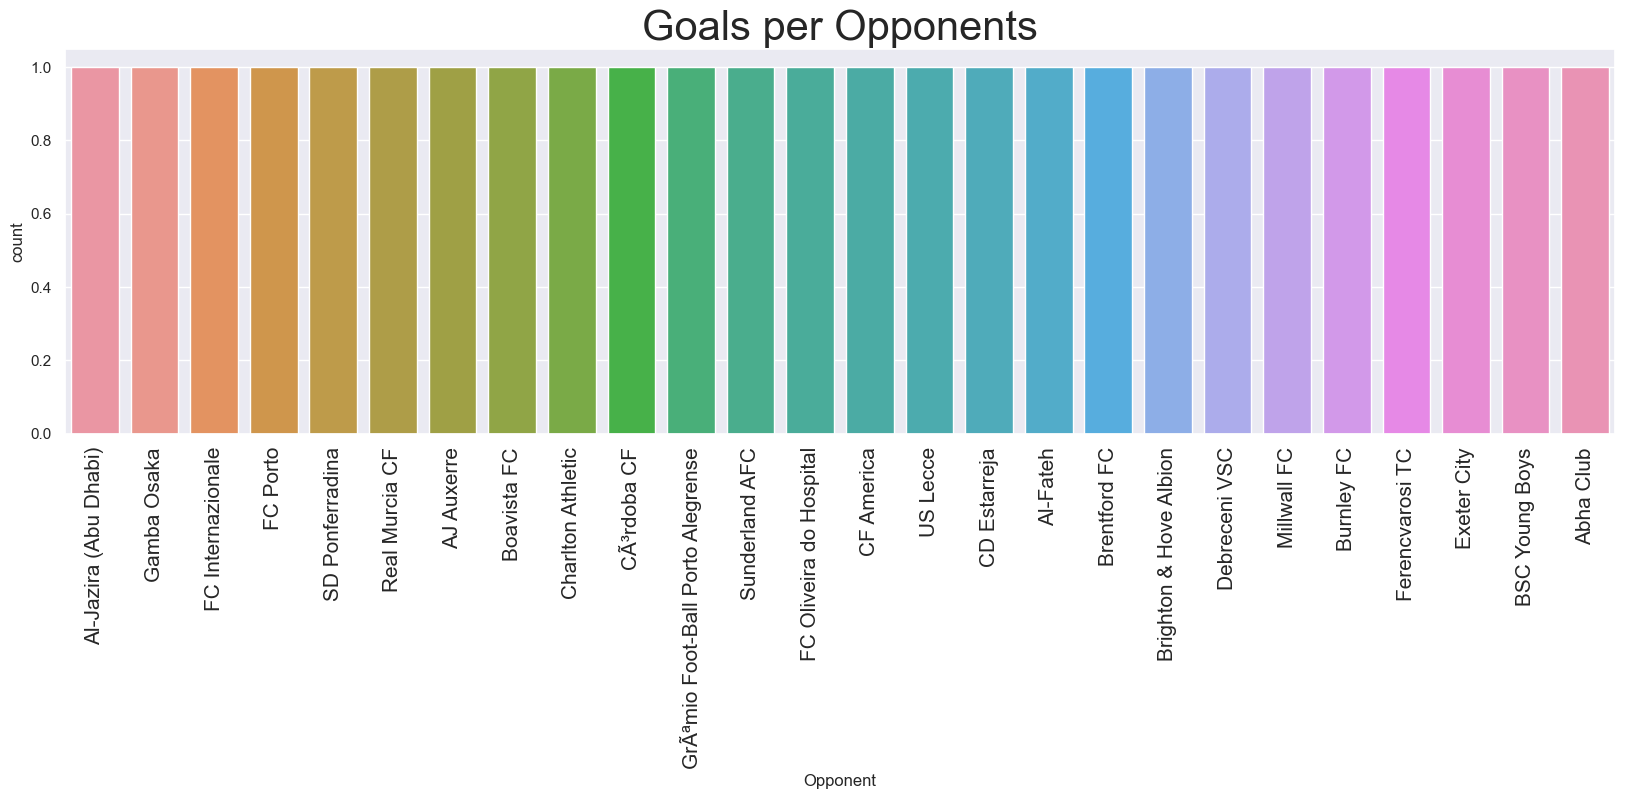

In [44]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Opponent'],order=mins5)
p.axes.set_title("Goals per Opponents",fontsize=30)

### Favorite Opponent

<BarContainer object of 7 artists>

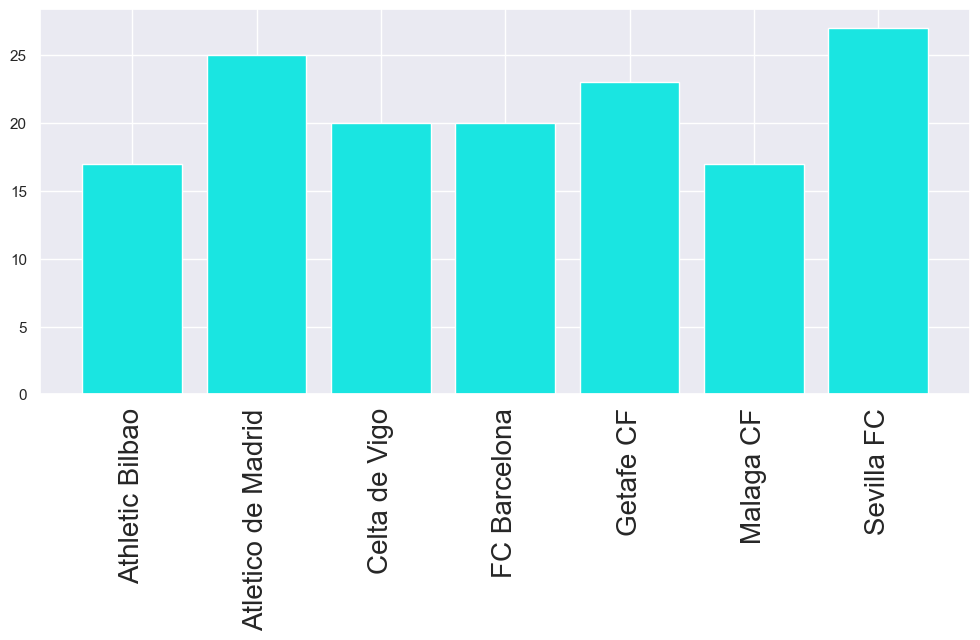

In [45]:
sns.set(rc={'figure.figsize':(12,5)})
opponents_df=df.groupby('Opponent').size().reset_index(name='count')
fav_opponents_df=opponents_df[opponents_df["count"]>15]
plt.xticks(fontsize=20,rotation='vertical')
plt.bar(x=fav_opponents_df['Opponent'],height=fav_opponents_df['count'],color="#1ae5e1")

### Goals Assisted BY

C:\Users\django\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Goals Assist')

C:\Users\django\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



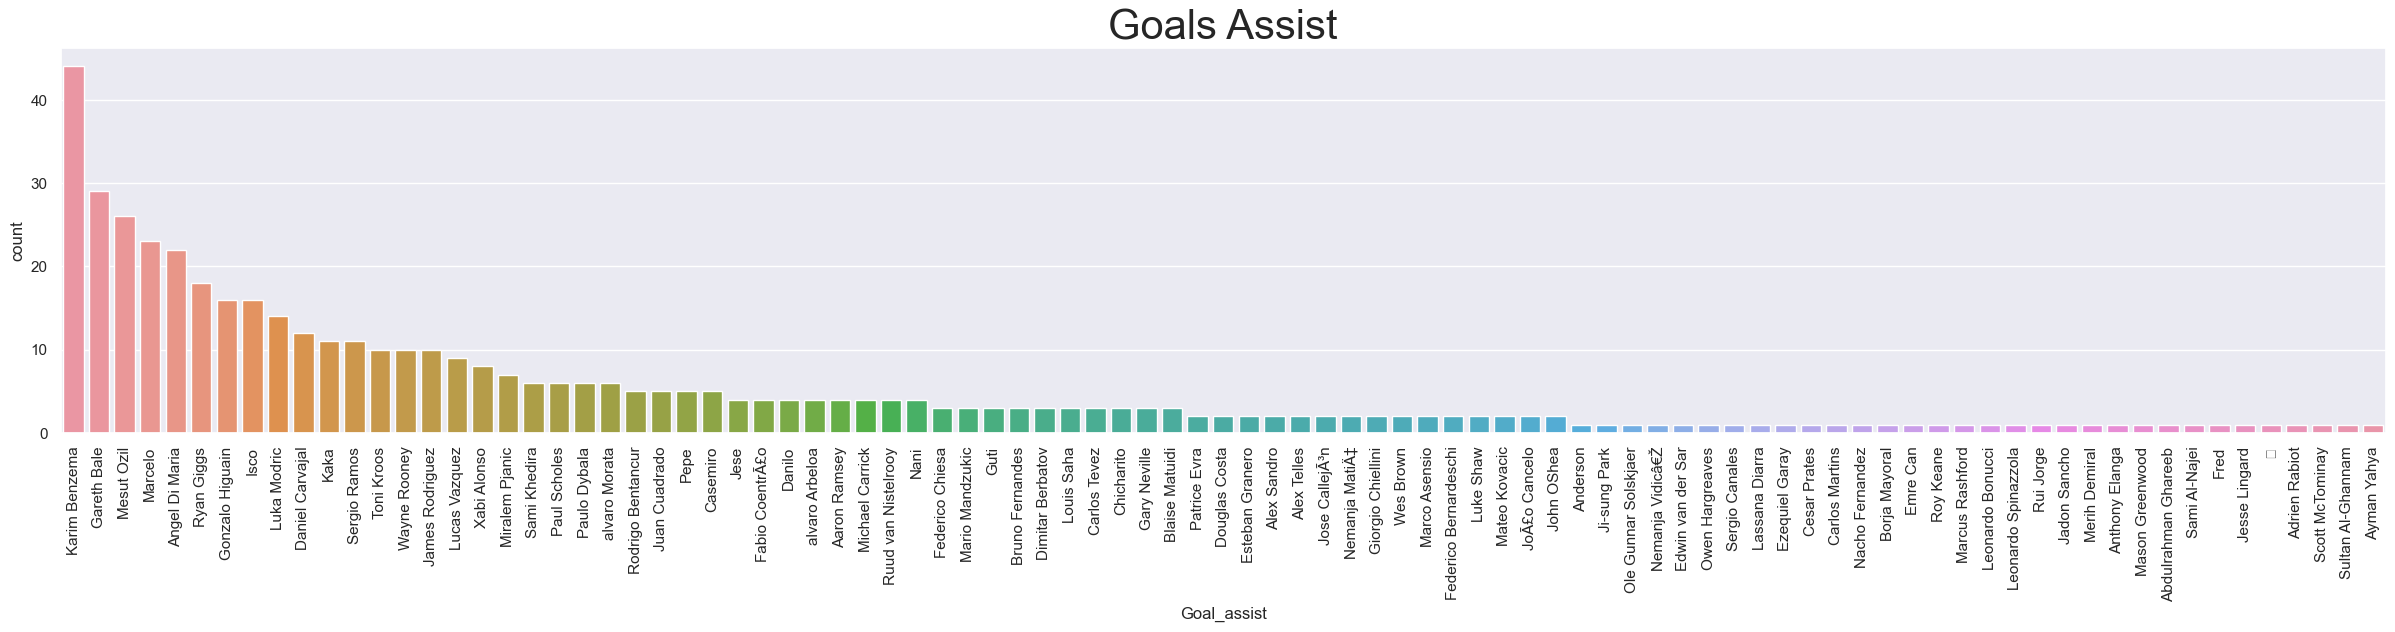

In [46]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=df.Goal_assist.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals Assist",fontsize=30)

In [47]:
mins=list(map(str, df.Goal_assist.value_counts().sort_values(ascending=False).index))
for min in df['Goal_assist']:
    if min not in mins:
        mins.append(min)
mins1=mins[:int(len(mins)/5)]
mins2=mins[int(len(mins)/5):int(2*len(mins)/5)]
mins3=mins[2*int(len(mins)/5):int(3*len(mins)/5)]
mins4=mins[3*int(len(mins)/5):int(4*len(mins)/5)]
mins5=mins[int(4*len(mins)/5):]

C:\Users\django\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Goals Assisted by')

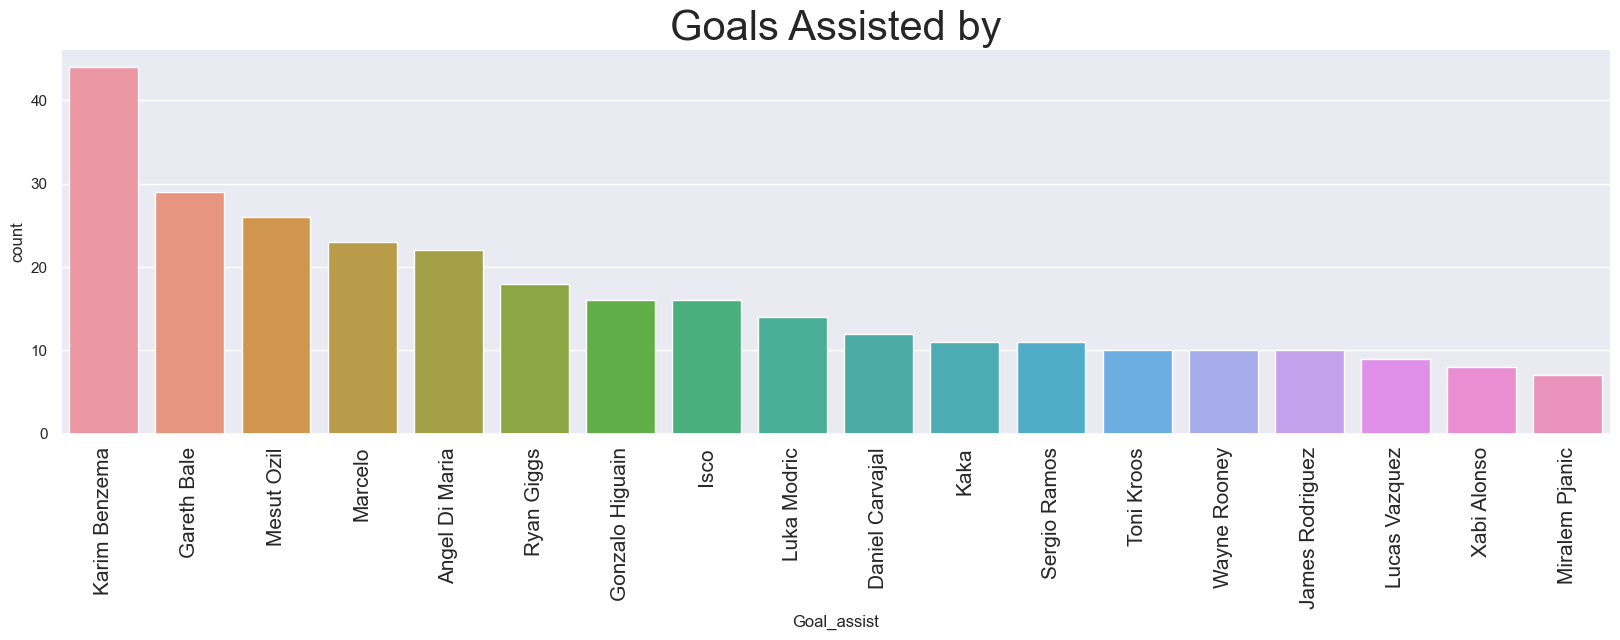

In [48]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins1)
p.axes.set_title("Goals Assisted by",fontsize=30)

C:\Users\django\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Goals Assisted by')

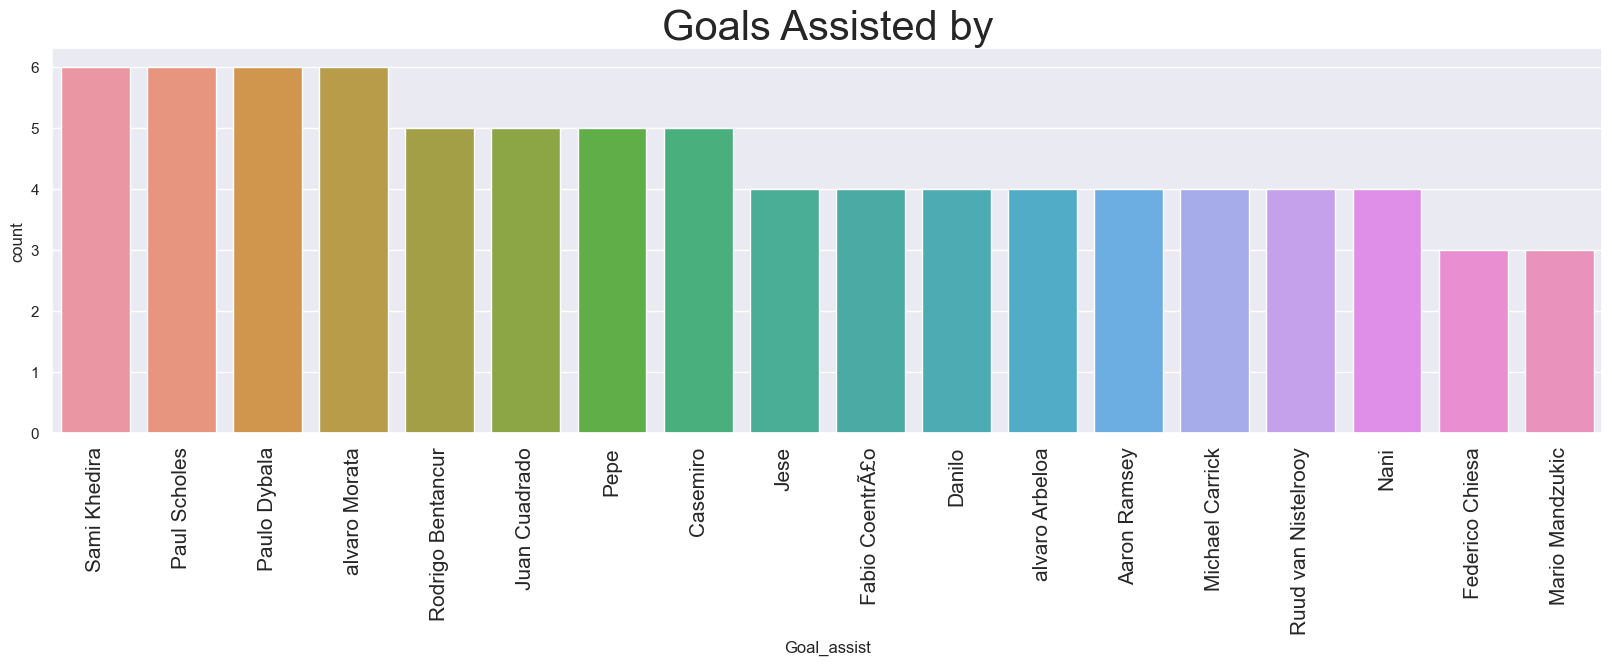

In [49]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins2)
p.axes.set_title("Goals Assisted by",fontsize=30)

C:\Users\django\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Goals Assisted by')

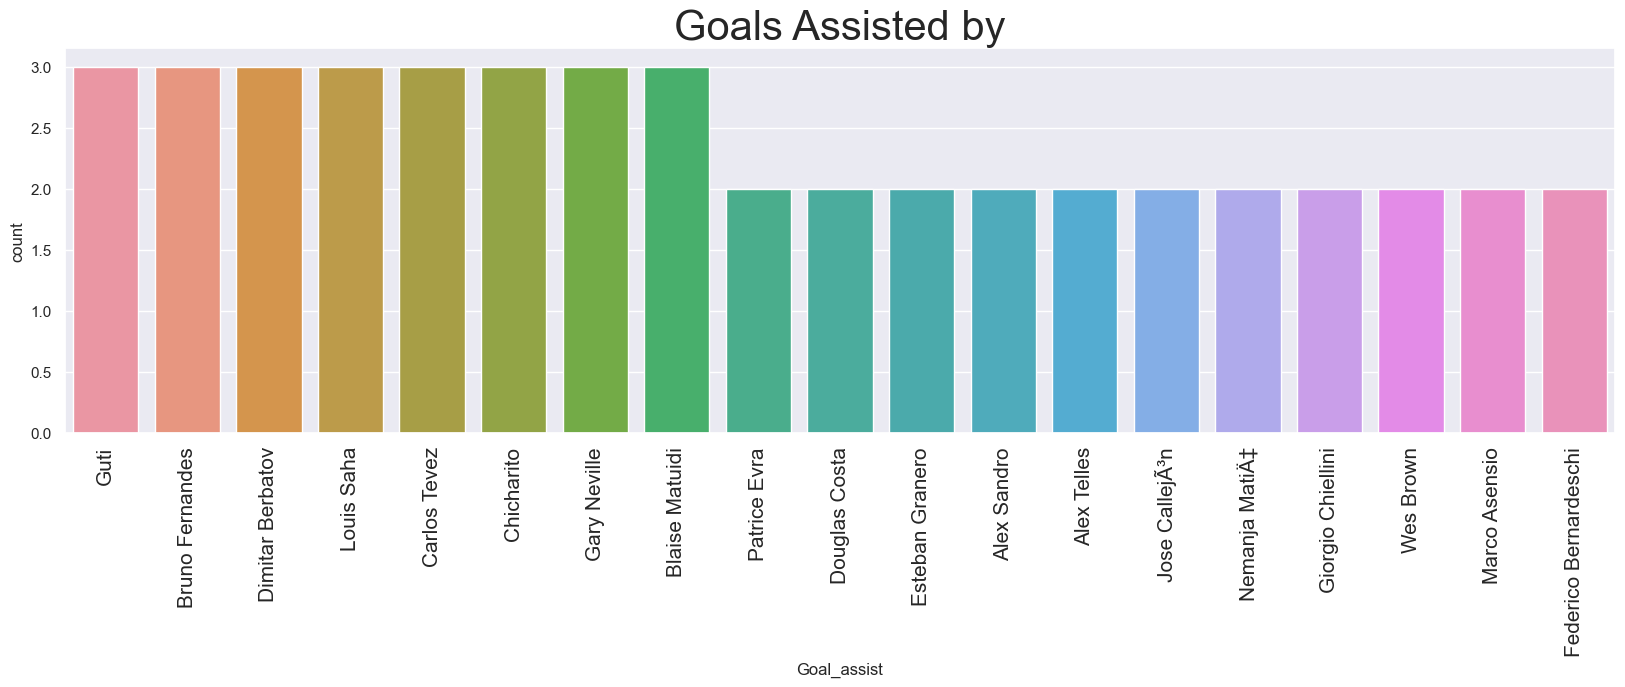

In [50]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins3)
p.axes.set_title("Goals Assisted by",fontsize=30)

C:\Users\django\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Goals Assisted by')

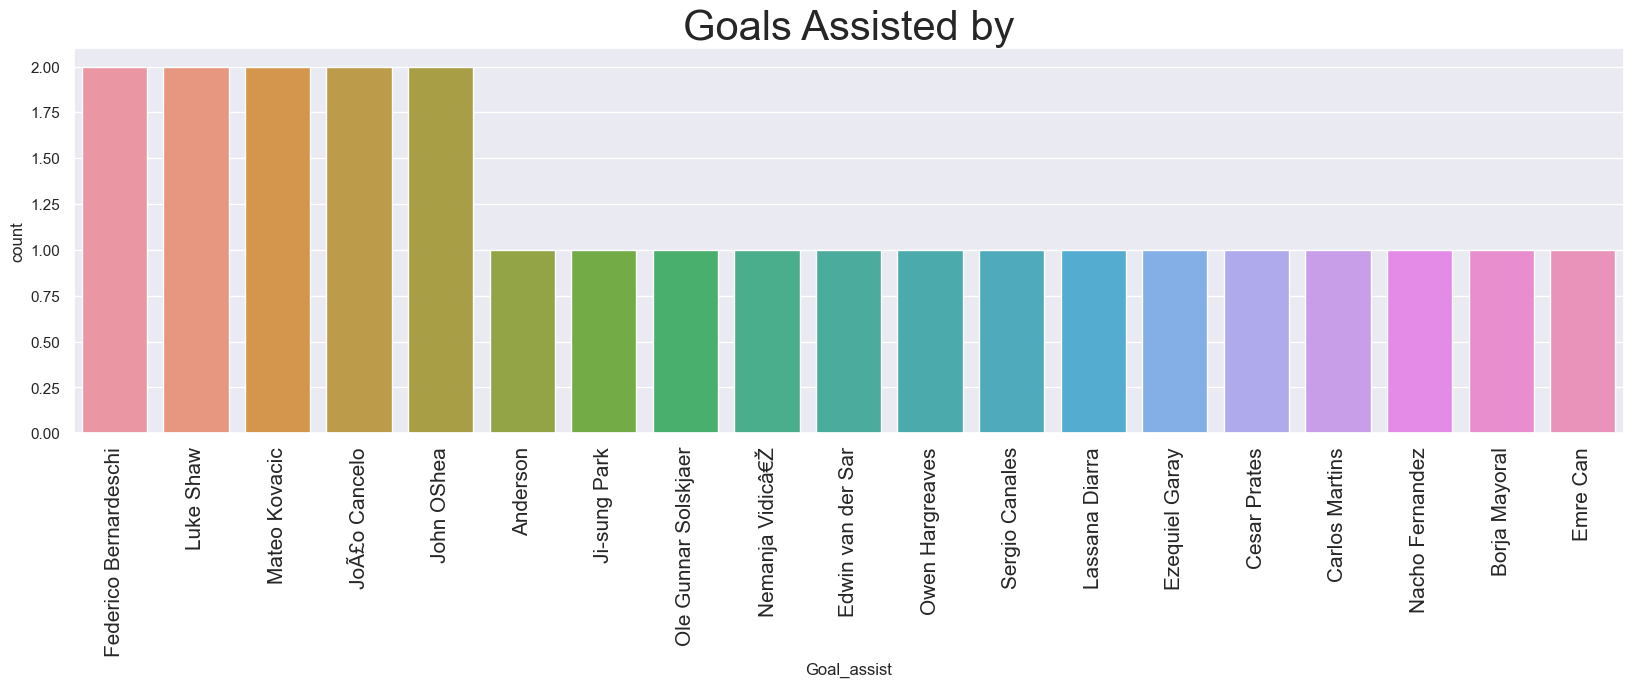

In [51]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins4)
p.axes.set_title("Goals Assisted by",fontsize=30)

C:\Users\django\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Goals Assisted by')

C:\Users\django\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



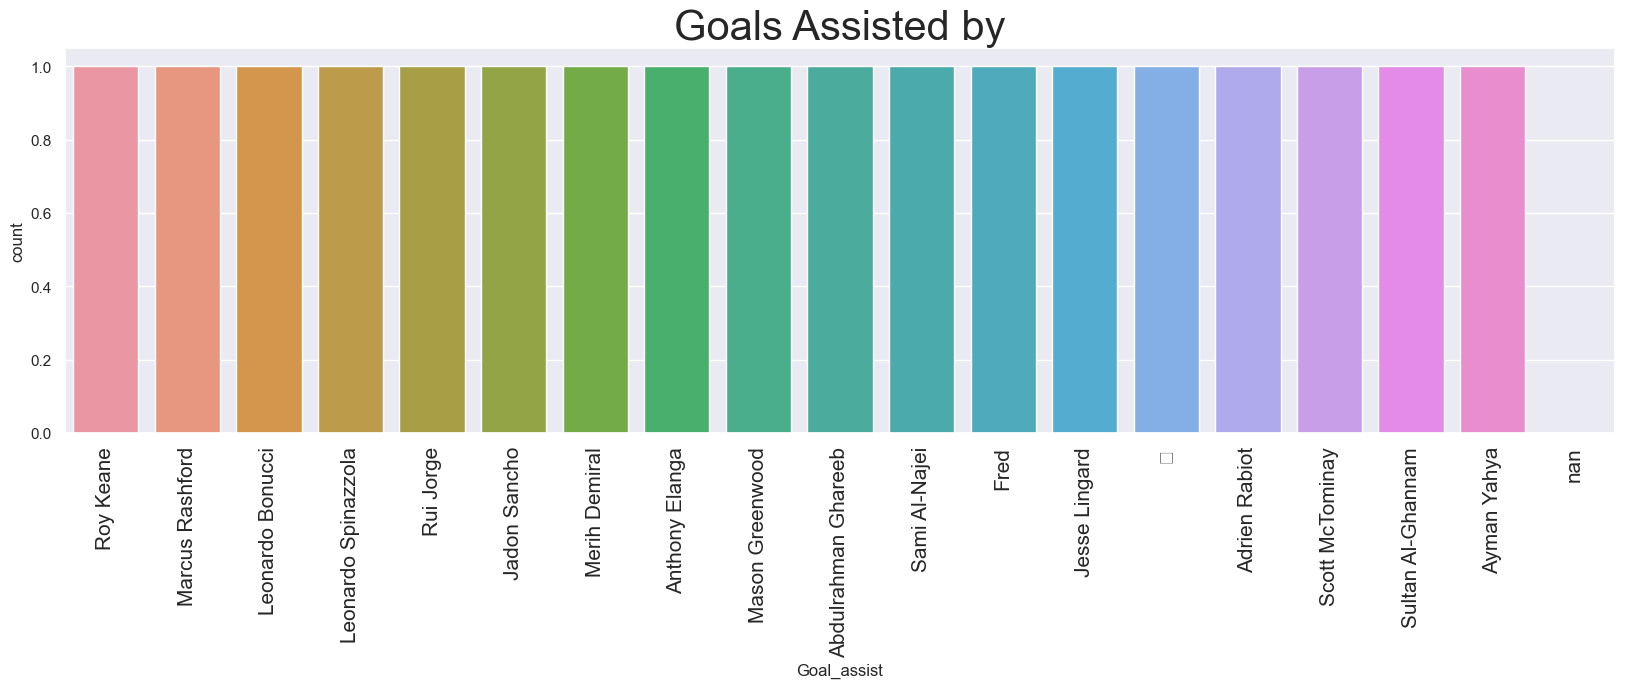

In [52]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=mins5)
p.axes.set_title("Goals Assisted by",fontsize=30)

### Home and Away Goals

<AxesSubplot:title={'center':'Goals per venue'}, ylabel='Venue'>

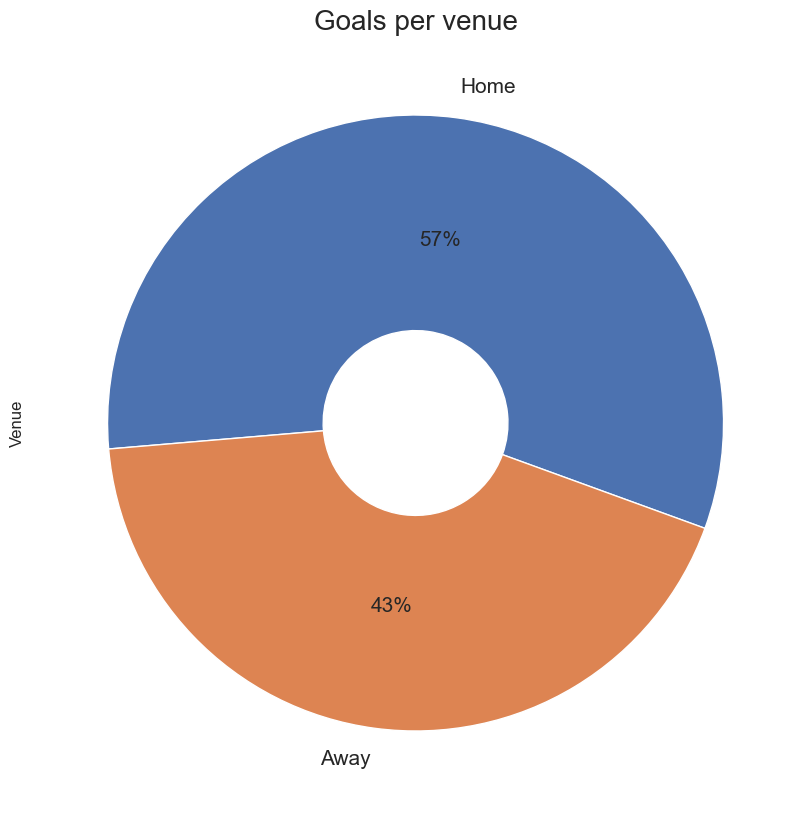

In [53]:
plt.figure(figsize=(30,10))
plt.title('Goals per venue', fontsize=20)
df.Venue.value_counts().plot(kind='pie', labels=['Home', 'Away'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})